# Contour Processing

In [13]:
## Loading Libraries

import numpy as np
import cv2
from google.colab.patches import cv2_imshow

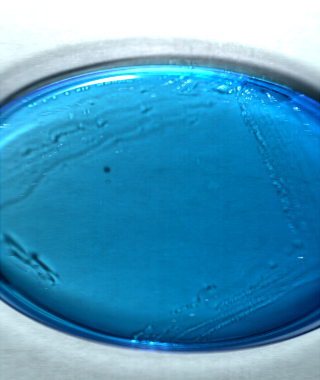

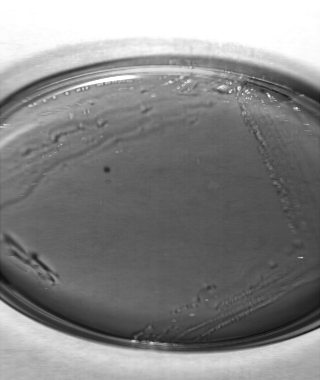

In [14]:
##  Loading Image

img = cv2.imread('image.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

cv2_imshow(img)
cv2_imshow(img_gray)

## Contour Detection

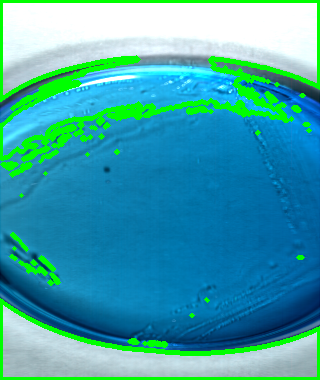

In [15]:
_, bin_img = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

contours, hierarchy = cv2.findContours(bin_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

contour_img = cv2.drawContours(img.copy(), contours, -1, (0, 255, 0), 3)  # Green color, thickness 3

cv2_imshow(contour_img)

## Contour Approximation

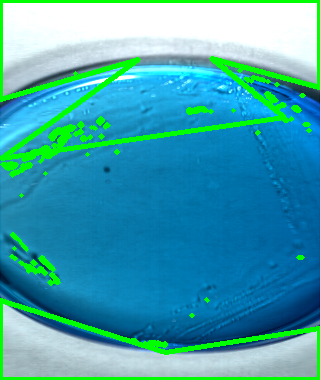

In [17]:
ca_img = img.copy()

for contour in contours:
    # Calculate the perimeter of the contour
    epsilon = 0.02 * cv2.arcLength(contour, True)  # 2% accuracy
    approx = cv2.approxPolyDP(contour, epsilon, True)

    # Draw the approximated polygon
    cv2.drawContours(ca_img, [approx], -1, (0, 255, 0), 3)

# Display the image with contours
cv2_imshow(ca_img)

## Finding Contour Properties

In [19]:
area = cv2.contourArea(contour)
perimeter = cv2.arcLength(contour, True)
x, y, w, h = cv2.boundingRect(contour)
contour_img = img.copy()
cv2.rectangle(contour_img, (x, y), (x + w, y + h), (0, 255, 0), 2)

print(area, perimeter, x, y, w, h)

32407.5 1956.7808666229248 0 0 320 159


## Blob Detection

### Simple Blob detection

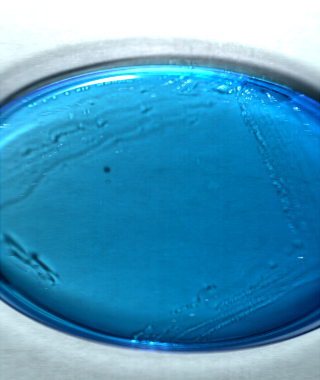

In [21]:
params = cv2.SimpleBlobDetector_Params()

#### filter by area
params.filterByArea = True
params.minArea = 1000

# Filter by Circularity (optional)
params.filterByCircularity = True
params.minCircularity = 0.16  # Circularity between 0 and 1 (0 = ellipse, 1 = perfect circle)

# Filter by Convexity (optional)
params.filterByConvexity = True
params.minConvexity = 0.9

# Filter by Inertia (optional)
params.filterByInertia = True
params.minInertiaRatio = 0.01

detector = cv2.SimpleBlobDetector_create(params)

keypoints = detector.detect(img_gray)

img_with_blob = cv2.drawKeypoints(img, keypoints, None, (0, 255, 0), cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)

cv2_imshow(img_with_blob)

### Maximally Stable Extremal Regions (MSER)

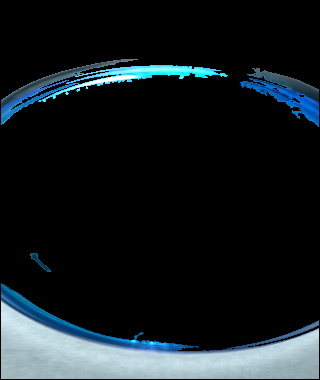

In [23]:
mser = cv2.MSER_create()
regions, _ = mser.detectRegions(img_gray)
mask = np.zeros_like(img_gray)

for region in regions:
  for point in region:
    x, y = point
    mask[y, x] = 255

result = cv2.bitwise_and(img, img, mask = mask)
cv2_imshow(result)

### Laplacian of Gaussian (LoG)

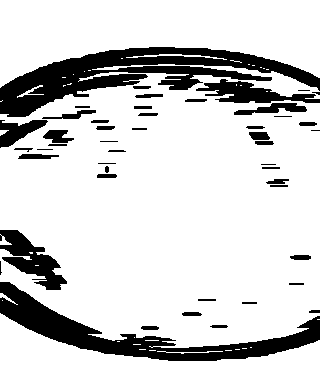

In [26]:
from scipy.ndimage import gaussian_laplace

log = gaussian_laplace(img_gray, sigma=3)
log_binary = np.uint8(log < 0.03) * 255

cv2_imshow(log_binary)

###  Scale-Invariant Feature Transform (SIFT)

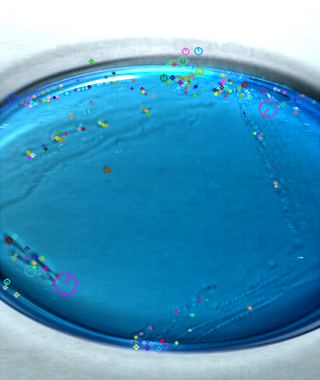

In [27]:
sift = cv2.SIFT_create()

keypoints = sift.detect(img_gray, None)

image_with_keypoints = cv2.drawKeypoints(img, keypoints, None, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv2_imshow(image_with_keypoints)

### Difference of Gaussian (DoG)

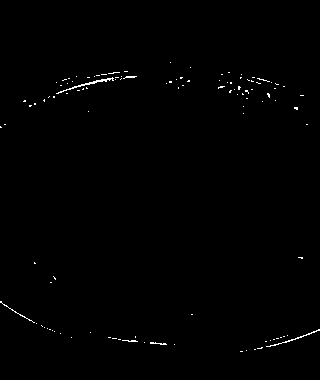

In [29]:
blur1= cv2.GaussianBlur(img_gray, (5, 5), 1)
blur2= cv2.GaussianBlur(img_gray, (5, 5), 5)

dog = cv2.subtract(blur1, blur2)

_, dog_binary = cv2.threshold(dog, 10, 255, cv2.THRESH_BINARY)

cv2_imshow(dog_binary)

### K-Means Clustering

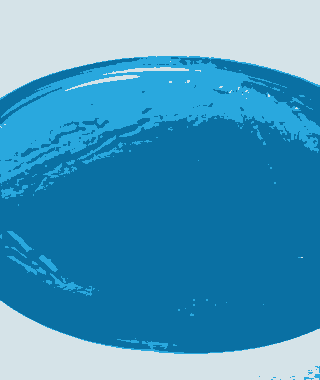

In [30]:
pixels = img.reshape((-1, 3))
pixels = np.float32(pixels)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3

_, labels, centers = cv2.kmeans(pixels, k, None, criteria, 100, cv2.KMEANS_RANDOM_CENTERS)

centers = np.uint8(centers)
segment_img = centers[labels.flatten()]
segment_img = segment_img.reshape(img.shape)

cv2_imshow(segment_img)

### Connected Components


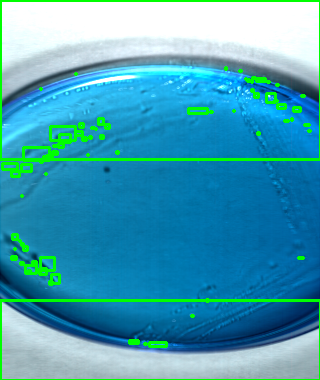

In [31]:
_, bin_img = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(bin_img)

for i in range(1, num_labels):
  x, y, w, h, area = stats[i]
  cv2.rectangle(img, (x, y), (x+w, y + h),(0, 255, 0), 2)

cv2_imshow(img)

## Keypoints Detection and Description

### ORB (Oriented FAST and Rotated BRIEF)

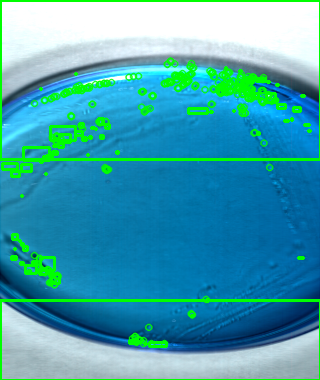

In [32]:
orb = cv2.ORB_create()

keypoints, descriptors = orb.detectAndCompute(img_gray, None)

output = cv2.drawKeypoints(img, keypoints, None, color=(0, 255, 0), flags=0)

cv2_imshow(output)

### FAST (Features from Accelerated Segment Test)

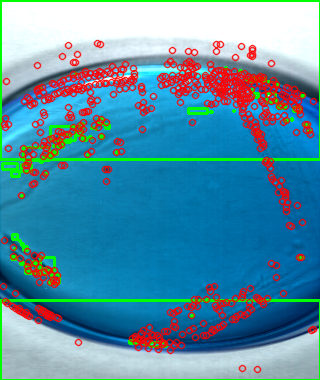

In [33]:
fast = cv2.FastFeatureDetector_create()

keypoints = fast.detect(img_gray, None)

output = cv2.drawKeypoints(img, keypoints, None, color = (0, 0, 255))

cv2_imshow(output)

### AKAZE (Accelerated KAZE)

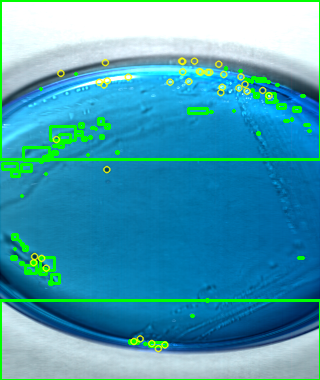

In [34]:
akaze = cv2.AKAZE_create()

keypoints, descriptors = akaze.detectAndCompute(img_gray, None)

output = cv2.drawKeypoints(img, keypoints, None, color = (0, 255, 255))

cv2_imshow(output)

### Detailed Process

In [ ]:
img1 = cv2.imread('image1.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('image2.jpg', cv2.IMREAD_GRAYSCALE)

# Detect and compute using ORB
orb = cv2.ORB_create()
keypoints1, descriptors1 = orb.detectAndCompute(img1, None)
keypoints2, descriptors2 = orb.detectAndCompute(img2, None)

# Match descriptors
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(descriptors1, descriptors2)

# Sort matches by distance
matches = sorted(matches, key=lambda x: x.distance)

# Draw matches
output = cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches[:20], None)

cv2.imshow('Matches', output)
cv2.waitKey(0)
cv2.destroyAllWindows()